In [1]:
import numpy as np
#importing everything is very slow?
from qiskit import *
%matplotlib inline

def createOracleBalanced(q,c,n=2):
    circuit = QuantumCircuit(q,c)
    for i in range(n):
        circuit.cx(q[i], q[n])
    circuit.barrier(q)
    return circuit

def createOracleConstantOne(q,c,n=2):
    circuit = QuantumCircuit(q,c)
    circuit.x(q[n])
    circuit.barrier(q)
    return circuit

def createOracleConstantZero(q,c):
    circuit = QuantumCircuit(q,c)
    circuit.barrier(q)
    return circuit

def createInitialState(circuit, n=2):
    for i in range(n):
        circuit.h(q[i])
    circuit.barrier(q)

def addAncilla(circuit, n=2):
    circuit.x(q[n])
    circuit.h(q[n])
    circuit.barrier(q)

def uncomputeAncilla(circuit, n=2):
    circuit.h(q[n])
    circuit.x(q[n])
    circuit.barrier(q)

def addMeasurement(circuit, n=2):
    for i in range(n):
        circuit.h(q[i])
    circuit.barrier(q)
    for i in range(n):
        circuit.measure(q[i], c[i])
    circuit.barrier(q)

In [2]:
#Simulating
#Import Aer
from qiskit import Aer

def simulatingCircuit(circuit):
    # Run the quantum circuit on a statevector simulator backend
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    return result.get_counts(circuit)

In [3]:
n=4
n=8
Oracle = createOracleConstantOne
#Oracle = createOracleBalanced
q = QuantumRegister(n+1,"q")
c = ClassicalRegister(n+1,"c")
circuit = QuantumCircuit(q,c)
createInitialState(circuit,n)
addAncilla(circuit,n)
circuit = circuit + Oracle(q,c,n)
uncomputeAncilla(circuit,n)
addMeasurement(circuit,n)

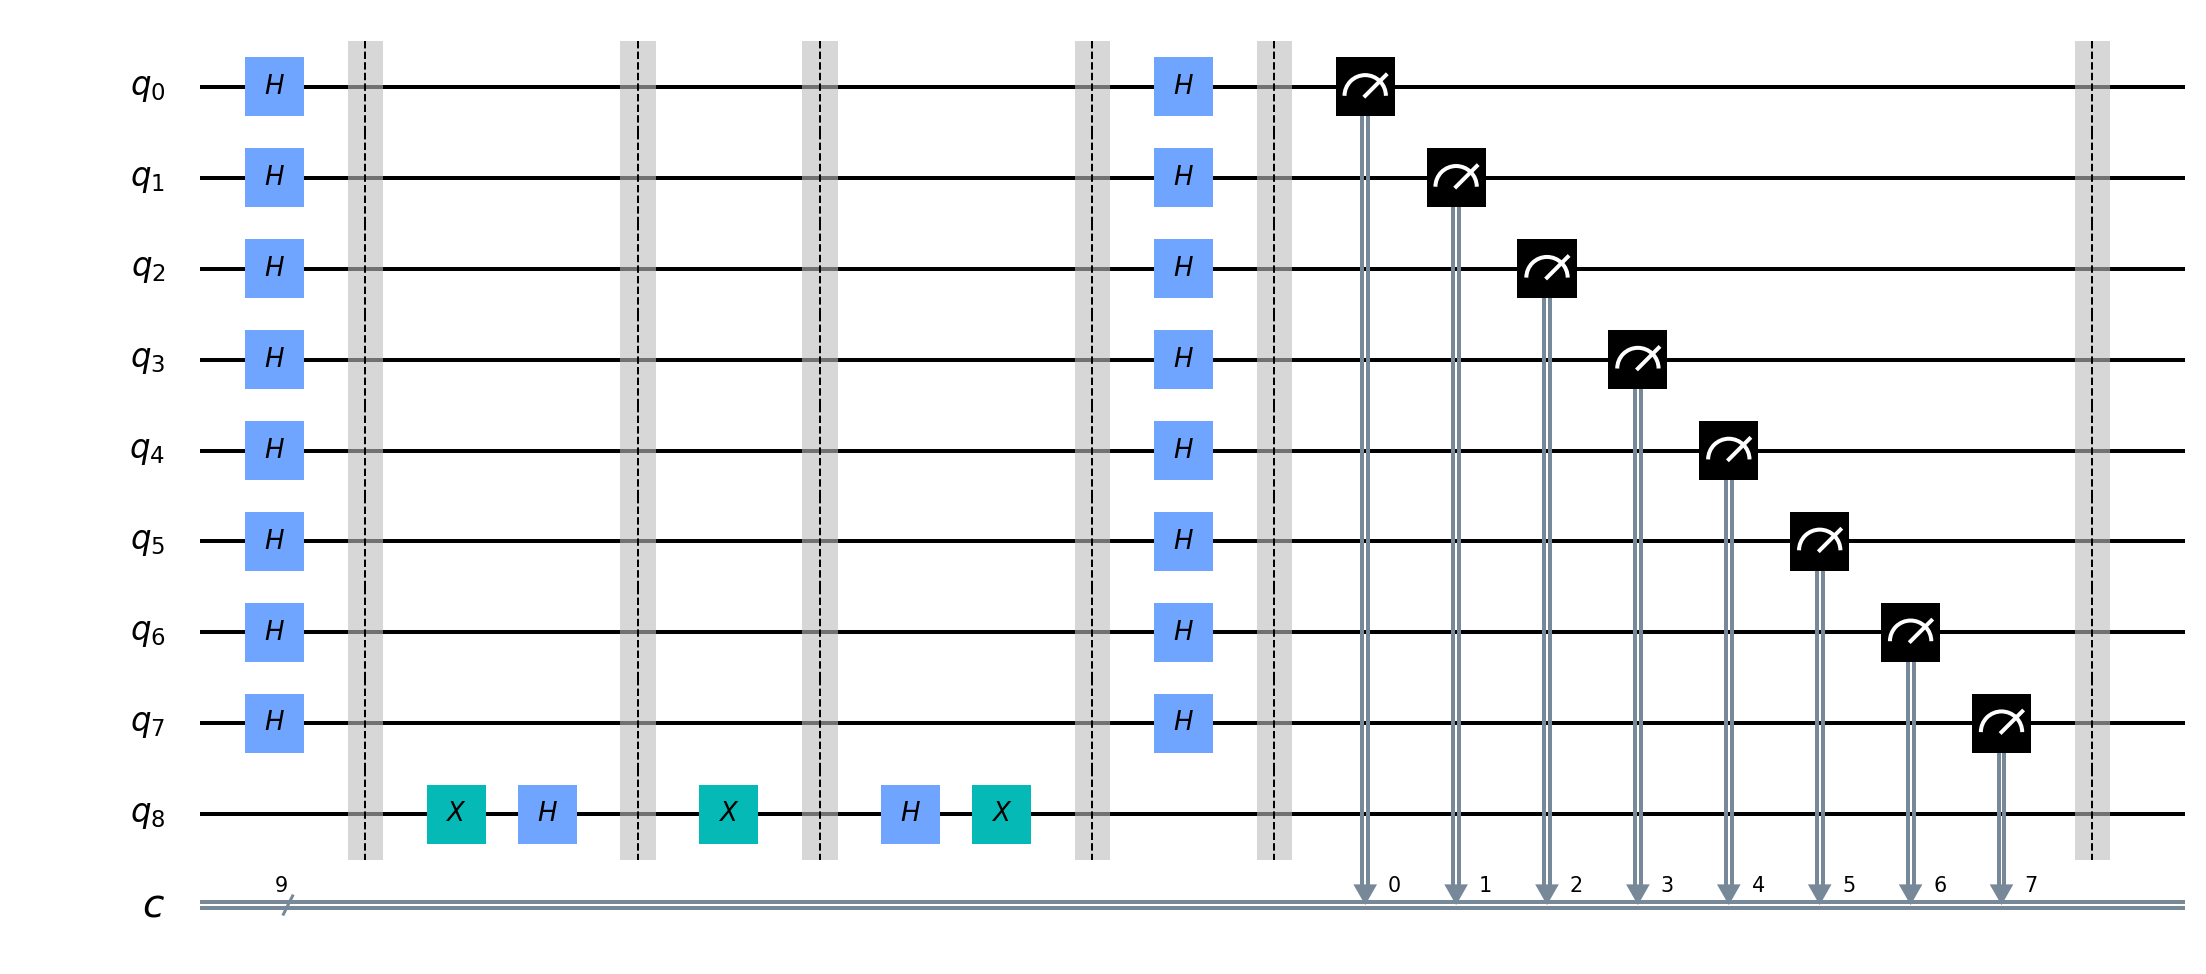

In [4]:
#draw circuit
circuit.draw('mpl')

{'000000000': 1}
constant


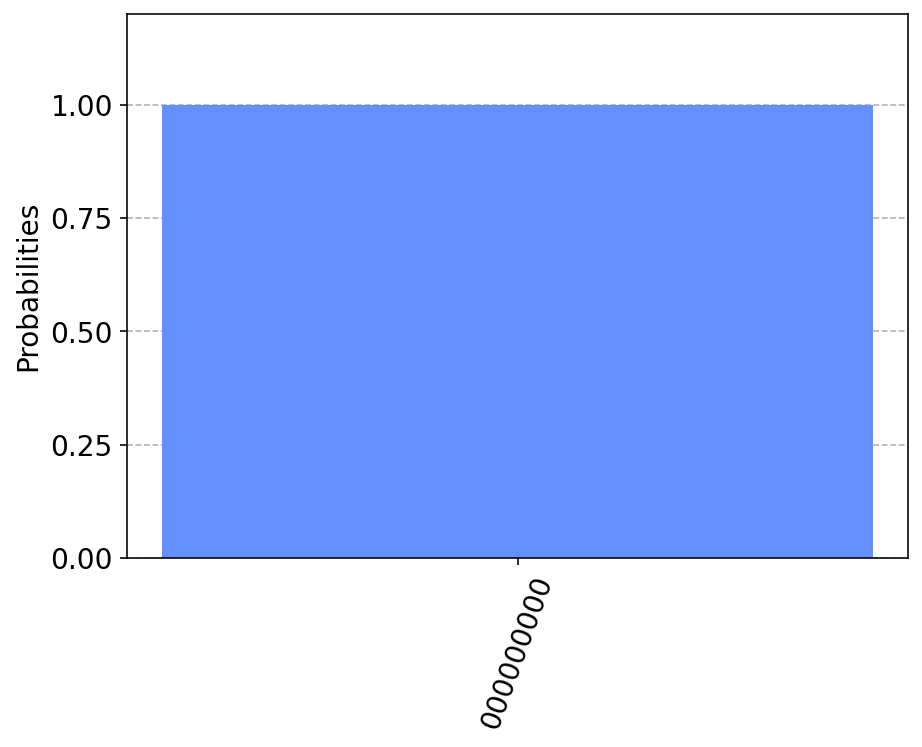

In [5]:
#Simulate ciruit
from qiskit.visualization import plot_histogram

counts = simulatingCircuit(circuit)
print(counts)
for x, y in counts.items():
    if x == '01111' and y > .5:
        print('balanced')
    else:
        print('constant')
plot_histogram(counts, bar_labels=False)

In [6]:
# #Old Simulating
# #Import Aer
# from qiskit import Aer
# # Run the quantum circuit on a statevector simulator backend
# backend = Aer.get_backend('statevector_simulator')
# job = execute(circuit, backend)
# result = job.result()
# outputstate = result.get_statevector(circuit, decimals=3)
# print(outputstate)
# #visualize density matrix
# from qiskit.visualization import plot_state_city
# plot_state_city(outputstate)

In [8]:
n=8
def probeOracle(x,createOracleBalanced):
    q = QuantumRegister(n+1,"q")
    c = ClassicalRegister(1,"c")
    circuit = QuantumCircuit(q,c)
    for i in range(n):
        if x[i] == 1:
            circuit.x(q[i])
    circuit.barrier(q)
    circuit = circuit + createOracleBalanced(q,c)
    circuit.measure(q[n], c[0])
    circuit.draw('mpl')
    job = execute(circuit, backend)
    result = job.result()
    counts = result.get_counts(circuit)
    for x, y in counts.items():
        if x == '1' and y > .5:
            return 1
    return 0


backend = Aer.get_backend('statevector_simulator')
zero = False
one = False
Oracle = lambda q,c : createOracleConstantOne(q,c,n)
#Oracle = lambda q,c : createOracleBalanced(q,c,n)
for number in range(2**n):
    x = [(number >> bit) & 1 for bit in range(n - 1, -1, -1)]
    y = probeOracle(x,Oracle)
    print('f(',x,') = ', y)
    if y == 1:
        if zero:
            print('Oracle is balanced.')
            break
        one = True
    elif y == 0:
        if one:
            print('Oracle is balanced.')
            break
        zero = True
    if number == 2**(n-1)+1:
        print('Oracle is constant.')
        break


f( [0, 0, 0, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 0, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 0, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 0, 1, 1, 0] ) =  1


f( [0, 0, 0, 0, 0, 1, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 0, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 0, 1, 0] ) =  1


f( [0, 0, 0, 0, 1, 0, 1, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 0, 0] ) =  1
f(

 [0, 0, 0, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 0] ) =  1
f( [0, 0, 0, 0, 1, 1, 1, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 0, 0] ) =  1


f( [0, 0, 0, 1, 0, 0, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 0] ) =  1
f( [0, 0, 0, 1, 0, 1, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 0, 1] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 0] ) =  1
f( [0, 0, 0, 1, 1, 0, 1, 1] ) =  1


f( [0, 0, 0, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 0, 1, 1, 1, 0, 1] ) =  1
f( [0, 0, 0, 1, 1, 1, 1, 0] ) =  1


f( [0, 0, 0, 1, 1, 1, 1, 1] ) =  1
f( [0, 0, 1, 0, 0, 0, 0, 0] ) =  1
f( [0, 0, 1, 0, 0, 0, 0, 1] ) =  1


f( [0, 0, 1, 0, 0, 0, 1, 0] ) =  1
f( [0, 0, 1, 0, 0, 0, 1, 1] ) =  1


f( [0, 0, 1, 0, 0, 1, 0, 0] ) =  1
f( [0, 0, 1, 0, 0, 1, 0, 1] ) =  1
f( [0, 0, 1, 0, 0, 1, 1, 0] ) =  1
f( [0, 0, 1, 0, 0, 1, 1, 1] ) =  1


f( [0, 0, 1, 0, 1, 0, 0, 0] ) =  1
f( [0, 0, 1, 0, 1, 0, 0, 1] ) =  1
f( [0, 0, 1, 0, 1, 0, 1, 0] ) =  1
f( [0, 0, 1, 0, 1, 0, 1, 1] ) =  1


f( [0, 0, 1, 0, 1, 1, 0, 0] ) =  1
f( [0, 0, 1, 0, 1, 1, 0, 1] ) =  1
f( [0, 0, 1, 0, 1, 1, 1, 0] ) =  1


f( [0, 0, 1, 0, 1, 1, 1, 1] ) =  1
f( [0, 0, 1, 1, 0, 0, 0, 0] ) =  1


f( [0, 0, 1, 1, 0, 0, 0, 1] ) =  1
f( [0, 0, 1, 1, 0, 0, 1, 0] ) =  1
f( [0, 0, 1, 1, 0, 0, 1, 1] ) =  1


f( [0, 0, 1, 1, 0, 1, 0, 0] ) =  1
f( [0, 0, 1, 1, 0, 1, 0, 1] ) =  1
f( [0, 0, 1, 1, 0, 1, 1, 0] ) =  1
f( [0, 0, 1, 1, 0, 1, 1, 1] ) =  

1


f( [0, 0, 1, 1, 1, 0, 0, 0] ) =  1
f( [0, 0, 1, 1, 1, 0, 0, 1] ) =  1
f( [0, 0, 1, 1, 1, 0, 1, 0] ) =  1
f(

 [0, 0, 1, 1, 1, 0, 1, 1] ) =  1
f( [0, 0, 1, 1, 1, 1, 0, 0] ) =  1
f( [0, 0, 1, 1, 1, 1, 0, 1] ) =  1


f( [0, 0, 1, 1, 1, 1, 1, 0] ) =  1
f( [0, 0, 1, 1, 1, 1, 1, 1] ) =  1
f( [0, 1, 0, 0, 0, 0, 0, 0] ) =  1


f( [0, 1, 0, 0, 0, 0, 0, 1] ) =  1
f( [0, 1, 0, 0, 0, 0, 1, 0] ) =  1
f( [0, 1, 0, 0, 0, 0, 1, 1] ) =  1
f( [0, 1, 0, 0, 0, 1, 0, 0] ) =  1


f( [0, 1, 0, 0, 0, 1, 0, 1] ) =  1
f( [0, 1, 0, 0, 0, 1, 1, 0] ) =  1
f( [0, 1, 0, 0, 0, 1, 1, 1] ) =  1


f( [0, 1, 0, 0, 1, 0, 0, 0] ) =  1
f( [0, 1, 0, 0, 1, 0, 0, 1] ) =  1
f( [0, 1, 0, 0, 1, 0, 1, 0] ) =  1
f( [0, 1, 0, 0, 1, 0, 1, 1] ) =  1


f( [0, 1, 0, 0, 1, 1, 0, 0] ) =  1
f( [0, 1, 0, 0, 1, 1, 0, 1] ) =  1
f( [0, 1, 0, 0, 1, 1, 1, 0] ) =  1


f( [0, 1, 0, 0, 1, 1, 1, 1] ) =  1
f( [0, 1, 0, 1, 0, 0, 0, 0] ) =  1


f( [0, 1, 0, 1, 0, 0, 0, 1] ) =  1
f( [0, 1, 0, 1, 0, 0, 1, 0] ) =  1
f( [0, 1, 0, 1, 0, 0, 1, 1] ) =  1
f( [0, 1, 0, 1, 0, 1, 0, 0] ) =  1


f( [0, 1, 0, 1, 0, 1, 0, 1] ) =  1
f( [0, 1, 0, 1, 0, 1, 1, 0] ) =  1
f( [0, 1, 0, 1, 0, 1, 1, 1] ) =  1


f( [0, 1, 0, 1, 1, 0, 0, 0] ) =  1
f( [0, 1, 0, 1, 1, 0, 0, 1] ) =  1
f( [0, 1, 0, 1, 1, 0, 1, 0] ) =  1


f( [0, 1, 0, 1, 1, 0, 1, 1] ) =  1
f( [0, 1, 0, 1, 1, 1, 0, 0] ) =  1
f( [0, 1, 0, 1, 1, 1, 0, 1] ) =  1


f( [0, 1, 0, 1, 1, 1, 1, 0] ) =  1


f( [0, 1, 0, 1, 1, 1, 1, 1] ) =  1
f( [0, 1, 1, 0, 0, 0, 0, 0] ) =  1
f( [0, 1, 1, 0, 0, 0, 0, 1] ) =  1


f( [0, 1, 1, 0, 0, 0, 1, 0] ) =  1
f( [0, 1, 1, 0, 0, 0, 1, 1] ) =  1
f( [0, 1, 1, 0, 0, 1, 0, 0] ) =  1


f( [0, 1, 1, 0, 0, 1, 0, 1] ) =  1
f( [0, 1, 1, 0, 0, 1, 1, 0] ) =  1
f( [0, 1, 1, 0, 0, 1, 1, 1] ) =  1


f( [0, 1, 1, 0, 1, 0, 0, 0] ) =  1
f( [0, 1, 1, 0, 1, 0, 0, 1] ) =  1
f( [0, 1, 1, 0, 1, 0, 1, 0] ) =  1


f( [0, 1, 1, 0, 1, 0, 1, 1] ) =  1
f( [0, 1, 1, 0, 1, 1, 0, 0] ) =  1
f( [0, 1, 1, 0, 1, 1, 0, 1] ) =  1


f( [0, 1, 1, 0, 1, 1, 1, 0] ) =  1


f( [0, 1, 1, 0, 1, 1, 1, 1] ) =  1
f( [0, 1, 1, 1, 0, 0, 0, 0] ) =  1
f( [0, 1, 1, 1, 0, 0, 0, 1] ) =  1
f( [0, 1, 1, 1, 0, 0, 1, 0] ) =  1


f( [0, 1, 1, 1, 0, 0, 1, 1] ) =  1
f( [0, 1, 1, 1, 0, 1, 0, 0] ) =  1
f( [0, 1, 1, 1, 0, 1, 0, 1] ) =  1


f( [0, 1, 1, 1, 0, 1, 1, 0] ) =  1
f( [0, 1, 1, 1, 0, 1, 1, 1] ) =  1
f( [0, 1, 1, 1, 1, 0, 0, 0] ) =  1


f( [0, 1, 1, 1, 1, 0, 0, 1] ) =  1
f( [0, 1, 1, 1, 1, 0, 1, 0] ) =  1


f( [0, 1, 1, 1, 1, 0, 1, 1] ) =  1
f( [0, 1, 1, 1, 1, 1, 0, 0] ) =  1
f( [0, 1, 1, 1, 1, 1, 0, 1] ) =  1


f( [0, 1, 1, 1, 1, 1, 1, 0] ) =  1
f( [0, 1, 1, 1, 1, 1, 1, 1] ) =  1
f( [1, 0, 0, 0, 0, 0, 0, 0] ) =  1


f( [1, 0, 0, 0, 0, 0, 0, 1] ) =  1
Oracle is constant.
